<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#The-Dry-LES-dataset" data-toc-modified-id="The-Dry-LES-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Dry LES dataset</a></span></li><li><span><a href="#Intro-to-netcdf" data-toc-modified-id="Intro-to-netcdf-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intro to netcdf</a></span></li><li><span><a href="#Intro-to-python-packages" data-toc-modified-id="Intro-to-python-packages-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intro to python packages</a></span></li><li><span><a href="#Dumping-the-netcdf-metadata" data-toc-modified-id="Dumping-the-netcdf-metadata-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dumping the netcdf metadata</a></span><ul class="toc-item"><li><span><a href="#Plot-$\theta$-profile-for-every-third-timestep-(i.e.-every-30-minutes)" data-toc-modified-id="Plot-$\theta$-profile-for-every-third-timestep-(i.e.-every-30-minutes)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot $\theta$ profile for every third timestep (i.e. every 30 minutes)</a></span></li><li><span><a href="#Color-contour-plot-of-one-level-for-realization-c1,-last-timestep" data-toc-modified-id="Color-contour-plot-of-one-level-for-realization-c1,-last-timestep-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Color contour plot of one level for realization c1, last timestep</a></span></li></ul></li></ul></div>

In [1]:
from matplotlib import pyplot as plt
from netCDF4 import Dataset
import numpy as np
import pooch

# The Dry LES dataset

This notebook looks at a portion of a dataset that was generated by running a large eddy simulation 10 different times with identical conditions.  The 10 realizations of temperature and pressure are stored as a single netcdf file

# Intro to netcdf

See the function descriptions and tutorial at http://unidata.github.io/netcdf4-python/

# Intro to python packages

a. do the following to install the course python code using [pip][1]:
   
     cd atsc405
     git fetch origin
     git reset --hard origin/master
     pip install -e .
    
   (this is called an "editable install", for reasons I'll explain in class)
   
   [1]: https://en.wikipedia.org/wiki/Pip_(package_manager)
 
b. Check the install by executing the cell below:

   If it succeeds, you should see:
   
       download case_60_10.nc: size is    499.3 Mbytes

In [2]:
# replace this with pooch!

#from  a405.utils.data_read import download
#the_root="http://clouds.eos.ubc.ca/~phil/docs/atsc500/data/"
#the_file='case_60_10.nc'
#out=download(the_file,root=the_root)
#out = pooch.retrieve(url=the_root + the_file, known_hash=None)

In [3]:
# there's a bug in the cell above. Workaround is to download the file manually from 
#
# https://clouds.eos.ubc.ca/~phil/docs/atsc500/data/
#
# and open it with:
from netCDF4 import Dataset
case_60_10 = Dataset("../../atsc405_data/case_60_10.nc", "r", format="NETCDF4")
print(case_60_10.data_model)

NETCDF4


In [4]:
help(case_60_10)

Help on Dataset object:

class Dataset(builtins.object)
 |  A netCDF `Dataset` is a collection of dimensions, groups, variables and
 |  attributes. Together they describe the meaning of data and relations among
 |  data fields stored in a netCDF file. See `Dataset.__init__` for more
 |  details.
 |  
 |  A list of attribute names corresponding to global netCDF attributes
 |  defined for the `Dataset` can be obtained with the
 |  `Dataset.ncattrs` method.
 |  These attributes can be created by assigning to an attribute of the
 |  `Dataset` instance. A dictionary containing all the netCDF attribute
 |  name/value pairs is provided by the `__dict__` attribute of a
 |  `Dataset` instance.
 |  
 |  The following class variables are read-only and should not be
 |  modified by the user.
 |  
 |  **`dimensions`**: The `dimensions` dictionary maps the names of
 |  dimensions defined for the `Group` or `Dataset` to instances of the
 |  `Dimension` class.
 |  
 |  **`variables`**: The `variables`

In [7]:
case_60_10.groups

{'c1': <class 'netCDF4._netCDF4.Group'>
 group /c1:
     dimensions(sizes): 
     variables(dimensions): float32 TABS(time, z, y, x), float32 W(time, z, y, x), float32 U(time, z, y, x), float32 V(time, z, y, x)
     groups: ,
 'c2': <class 'netCDF4._netCDF4.Group'>
 group /c2:
     dimensions(sizes): 
     variables(dimensions): float32 TABS(time, z, y, x), float32 W(time, z, y, x), float32 U(time, z, y, x), float32 V(time, z, y, x)
     groups: ,
 'c3': <class 'netCDF4._netCDF4.Group'>
 group /c3:
     dimensions(sizes): 
     variables(dimensions): float32 TABS(time, z, y, x), float32 W(time, z, y, x), float32 U(time, z, y, x), float32 V(time, z, y, x)
     groups: ,
 'c4': <class 'netCDF4._netCDF4.Group'>
 group /c4:
     dimensions(sizes): 
     variables(dimensions): float32 TABS(time, z, y, x), float32 W(time, z, y, x), float32 U(time, z, y, x), float32 V(time, z, y, x)
     groups: ,
 'c5': <class 'netCDF4._netCDF4.Group'>
 group /c5:
     dimensions(sizes): 
     variables(dime

# Dumping the netcdf metadata

Netcdf file layout:  10 groups corresponding to 10 different ensemble members.  Small slice of larger domain of LES run with surface heat flux of 60 W/m^2 and stable layer with dT/dz = 10 K/km.  Snapshots every 10 minutes for 8 hours.

We can read the metdata using

In [6]:
# !pyncdump case_60_10.nc

## Plot $\theta$ profile for every third timestep (i.e. every 30 minutes)

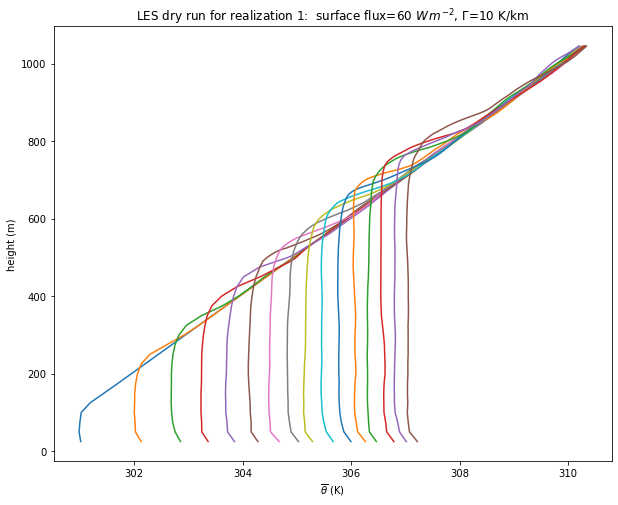

In [8]:
%matplotlib inline

def make_theta(temp,press):
    """
      temp in K
      press in Pa
      returns theta in K
    """
    p0=1.e5
    Rd=287.  #J/kg/K
    cpd=1004.  #J/kg/K
    theta=temp*(p0/press)**(Rd/cpd)
    return theta

#case_name='case_60_10.nc'
#
#  look at the first ensemble member
#
#ensemble='c1'
#with Dataset(case_name,'r') as ncin:
#    #
#    # grab the group variables
#    #
#    group = ncin.groups['c1']
#    temp=group.variables['TABS'][...]
#    press=ncin.variables['press'][...]
#    z=ncin.variables['z'][...]
#mean_temp=temp.mean(axis=(3,2))

group = case_60_10.groups["c1"]
temp=group.variables['TABS'][...]
press=case_60_10.variables['press'][...]
z=case_60_10.variables['z'][...]
mean_temp=temp.mean(axis=(3,2))

fig,ax=plt.subplots(1,1,figsize=(10,8))
for i in np.arange(0,temp.shape[0],3):
    theta = make_theta(mean_temp[i,:],press)
    ax.plot(theta,z)
out=ax.set(xlabel=r'$\overline{\theta}$ (K)',ylabel='height (m)',
       title='LES dry run for realization 1:  surface flux=60 $W\,m^{-2}$, $\Gamma$=10 K/km')

In [9]:
temp.shape

(48, 130, 20, 25)

## Color contour plot of one level for realization c1, last timestep

1. Find the index of the level closest to 400 meters
2. Retrieve the horizontal temperature field for this realization at the last timestep

In [28]:
index=np.searchsorted(z,400.)
temp_400=temp[-1,index,:,:]

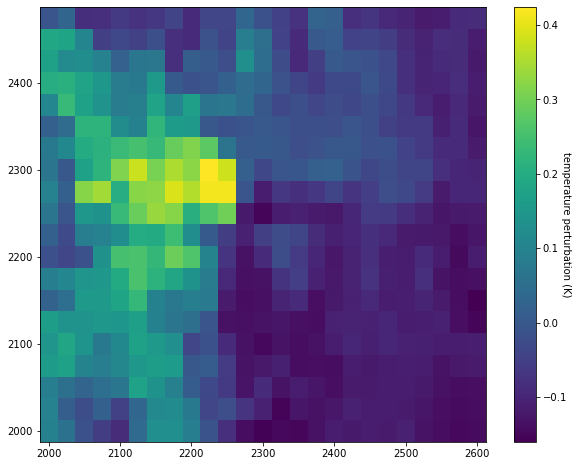

In [18]:
temp_diff=temp_400 - temp_400.mean(axis=(0,1))
fig,ax=plt.subplots(1,1,figsize=(10,8))
#with Dataset(case_60_10["c1"],'r') as ncin:
x=case_60_10.variables['x'][...]
y=case_60_10.variables['y'][...]
cs=ax.pcolormesh(x,y,temp_diff)
cb=fig.colorbar(cs)
cb.set_label('temperature perturbation (K)',rotation=-90)

## Andrew's Code

Add a cell to the `dry_les` notebook that uses `pcolormesh` to plot the temperature perturbation for the last timestep at z=800 meters for ensemble member 3.

In [41]:
 # grab the c3 ensemble member and assign dimensions to python variables
group = case_60_10.groups["c3"] 
temp=group.variables['TABS'][...] 
press=case_60_10.variables['press'][...]
z=case_60_10.variables['z'][...]

# get the z=800 layer at the last timestep
index=np.searchsorted(z,800.)
temp_800=temp[-1,index,:,:]

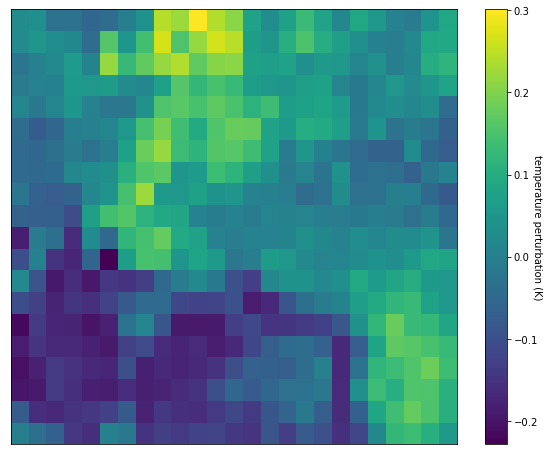

In [40]:
temp_diff=temp_800 - temp_800.mean(axis=(0,1))
fig,ax=plt.subplots(1,1,figsize=(10,8))
#with Dataset(case_60_10["c1"],'r') as ncin:
x=case_60_10.variables['x'][...]
y=case_60_10.variables['y'][...]
cs=ax.pcolormesh(x,y,temp_diff)
ax.set_xticks([])
ax.set_yticks([])
cb=fig.colorbar(cs)
cb.set_label('temperature perturbation (K)',rotation=-90)